In [14]:
import numpy as np
import re
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [15]:
nlp=spacy.load("en_core_web_sm")


In [16]:
medical_text="""Patient John Doe, 45 years old, diagnosed with Type 2 Diabetes. Complains of frequent urination, fatigue, and increased thirst.
 Prescribed Metformin 500m daily. Scheduled follow-up in 3 months."""


In [17]:
def preprocess_text(text):
  text=text.lower()
  text=re.sub(r"[^a-zA-Z0-9\s]",'',text)
  return text

In [18]:
clean_text=preprocess_text(medical_text)
print(clean_text)

patient john doe 45 years old diagnosed with type 2 diabetes complains of frequent urination fatigue and increased thirst
 prescribed metformin 500m daily scheduled followup in 3 months


In [8]:
def extract_entities(text):
  doc=nlp(text)
  entities=[(ent.text, ent.label_)for ent in doc.ents]
  return entities

entities=extract_entities(medical_text)
print("Extracted entites:",entities)

Extracted entites: [('John Doe', 'PERSON'), ('45 years old', 'DATE'), ('2', 'CARDINAL'), ('500mdaily', 'DATE'), ('3 months', 'DATE')]


In [10]:
from transformers import pipeline
sentiment_pipeline=pipeline("sentiment-analysis")
def analyze_sentiment(text):
  result=sentiment_pipeline(text)[0]
  return {"label":result['label'], "score":result['score']}

sentiment_result=analyze_sentiment(medical_text)
print(sentiment_result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


{'label': 'NEGATIVE', 'score': 0.9884061813354492}


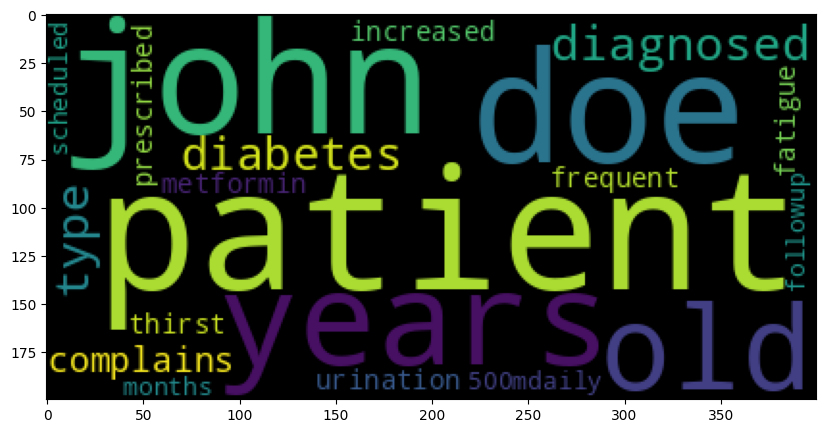

In [12]:
wc=WordCloud().generate(clean_text)
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.show()

In [13]:
insights={
    "key Entities":entities,
    "sentiment":sentiment_result['label'],
    "score":sentiment_result['score']

}
print(insights)

{'key Entities': [('John Doe', 'PERSON'), ('45 years old', 'DATE'), ('2', 'CARDINAL'), ('500mdaily', 'DATE'), ('3 months', 'DATE')], 'sentiment': 'NEGATIVE', 'score': 0.9884061813354492}
